# **Importing the libraries**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Importing the Dataset**

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv", index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# **Viewing the dataframe**

**a) Creating a copy of the dataframe**

In [89]:
df_1 = df.copy()

**the first five rows of the dataframe**

In [100]:
df_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [101]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 51.3 KB


**Observations:**

1.  All the columns are numerical.
2.  There is no single null values in the dataaset. 


In [102]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Observation**
1. Dispersion of data is not very large.

In [103]:
df_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

**Observation:**
1. Number of columns are 8 in total including target column

In [104]:
print(df_1.apply(lambda col: col.unique()))

GRE Score            [337, 324, 316, 322, 314, 330, 321, 308, 302, ...
TOEFL Score          [118, 107, 104, 110, 103, 115, 109, 101, 102, ...
University Rating                                      [4, 3, 2, 5, 1]
SOP                      [4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
LOR                      [4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]
CGPA                 [9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, ...
Research                                                        [1, 0]
Chance of Admit      [0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68,...
dtype: object


# **Preparing the dataframe**

In [105]:
df_1.columns = df_1.columns.str.strip()
df_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [106]:
df_1[df_1['Chance of Admit']>0.8]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
6,330,115,5,4.5,3.0,9.34,1,0.90
12,327,111,4,4.0,4.5,9.00,1,0.84
23,328,116,5,5.0,5.0,9.50,1,0.94
24,334,119,5,5.0,4.5,9.70,1,0.95
...,...,...,...,...,...,...,...,...
483,328,113,4,4.0,2.5,8.77,1,0.83
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96


In [107]:
df_1['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [108]:
df_1['CGPA'].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [137]:
df_1[df_1['Chance of Admit']>3]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,5
2,324,107,4,4.0,4.5,8.87,1,4
3,316,104,3,3.0,3.5,8.00,1,4
4,322,110,3,3.5,2.5,8.67,1,4
5,314,103,2,2.0,3.0,8.21,0,4
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,5
497,337,117,5,5.0,5.0,9.87,1,5
498,330,120,5,4.5,5.0,9.56,1,5


In [112]:
def level_function(x):
  if x<=0.20:
    x=1
  elif x<=0.40:
    x =2
  elif x<=0.60:
    x =3
  elif x<=0.80:
    x=4
  else:
    x=5

  return x


df_1['Chance of Admit'] = df_1['Chance of Admit'].apply(level_function)

df_1['Chance of Admit']

Serial No.
1      5
2      4
3      4
4      4
5      4
      ..
496    5
497    5
498    5
499    4
500    5
Name: Chance of Admit, Length: 500, dtype: int64

**Observations**
1.   'University Rating', 'SOP', 'LOR', 'Research' appers to be discrete.**bold text**


In [113]:
for i,v in enumerate(df_1.columns):
  print(v, df_1[v].unique())
  

GRE Score [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
TOEFL Score [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
University Rating [4 3 2 5 1]
SOP [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
CGPA [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27

**Observations**
1.   'University Rating', 'SOP', 'LOR', 'Research' and Chance of Admit appers to be discrete.

In [132]:
continous_features = ['GRE Score', 'TOEFL Score','CGPA']
discrete_features = [ 'University Rating', 'SOP', 'LOR', 'Research', 'Chance of Admit' ]

In [66]:
df_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

# **EDA**

a) pairplot

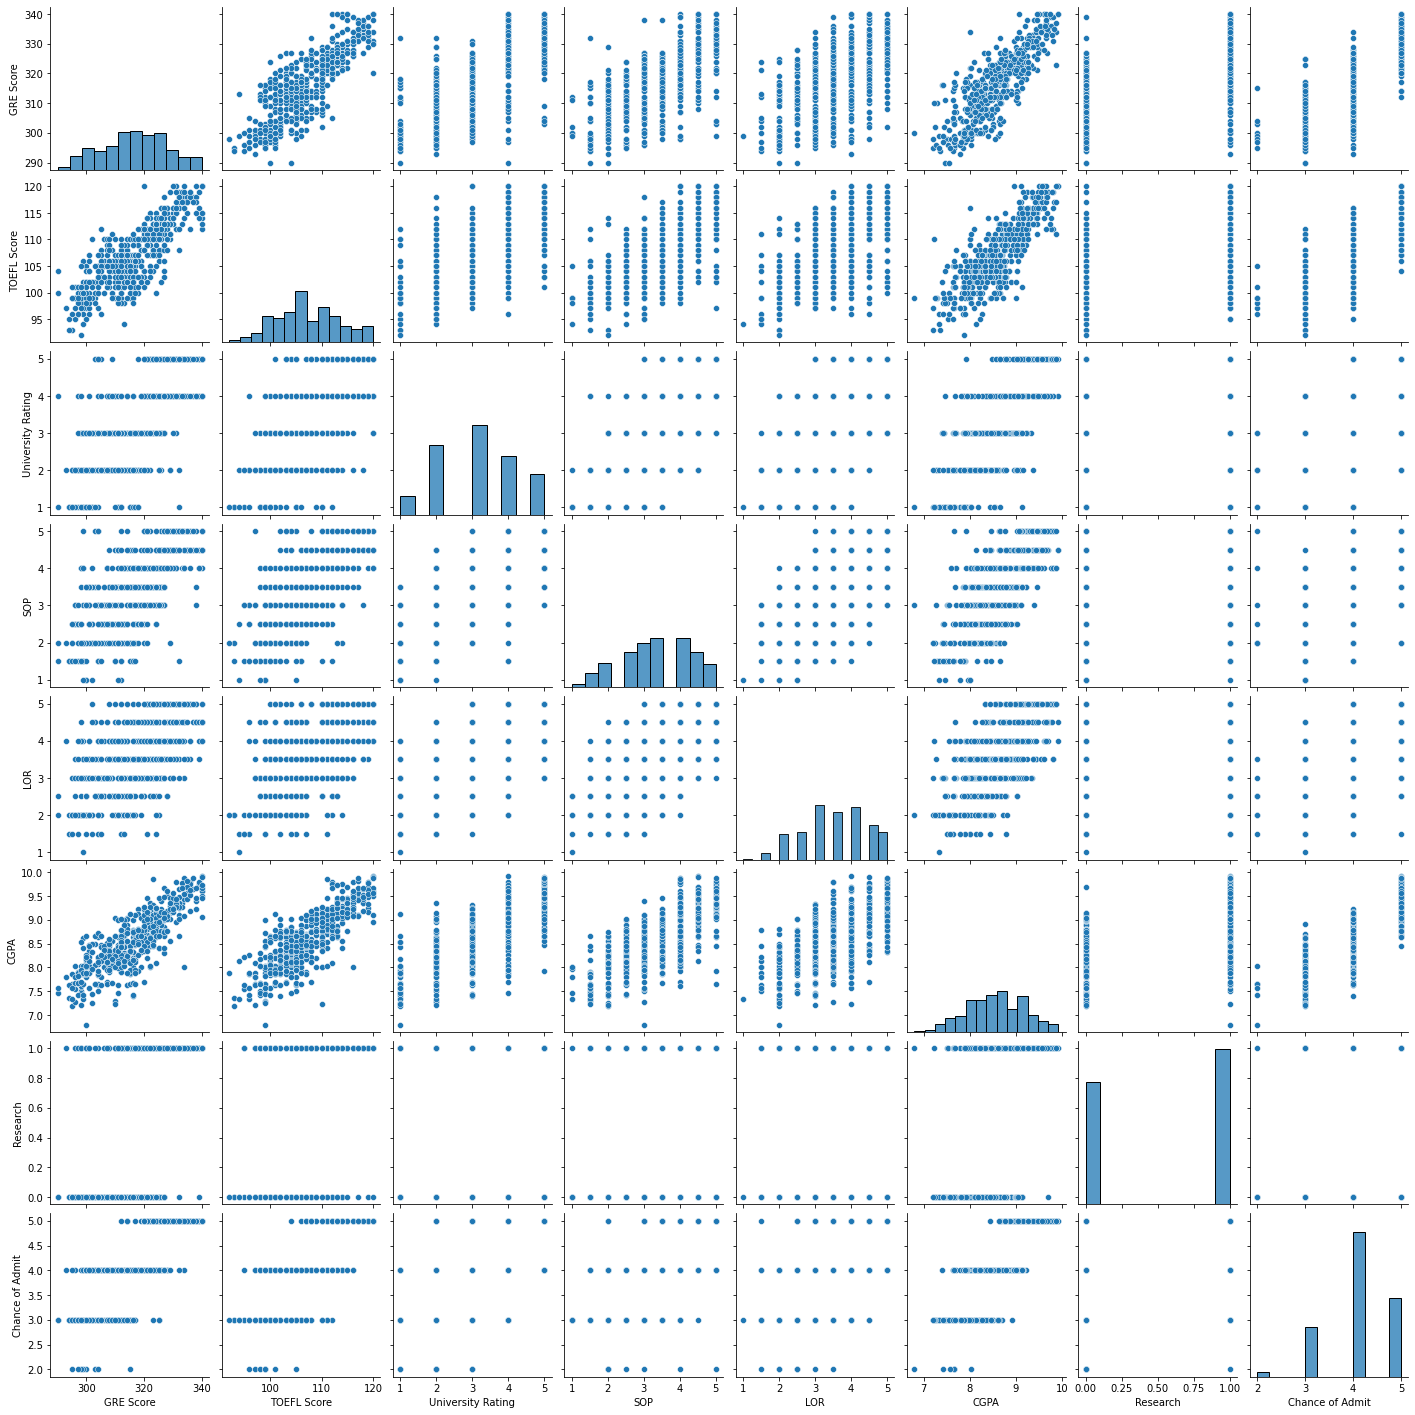

In [138]:
sns.pairplot(df_1)

b) Heatmap

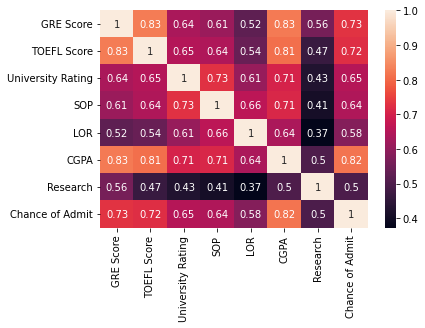

In [114]:
sns.heatmap(df_1.corr(), annot=True)

**Observations:**
1. There is high correlation between GRE Score, TOFEL Score ,CGPA and Chance of Admit.
2. 

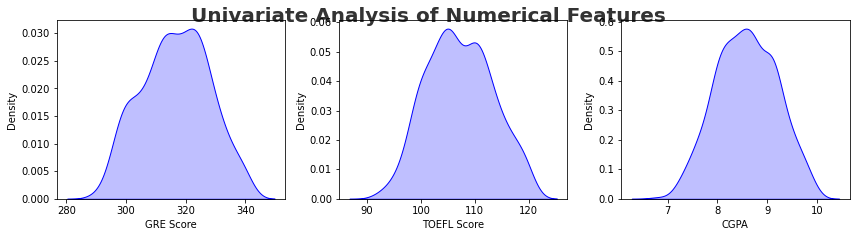

In [133]:
plt.figure(figsize=(12, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(continous_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df_1[continous_features[i]],shade=True, color='b')
    plt.xlabel(continous_features[i])
    plt.tight_layout()

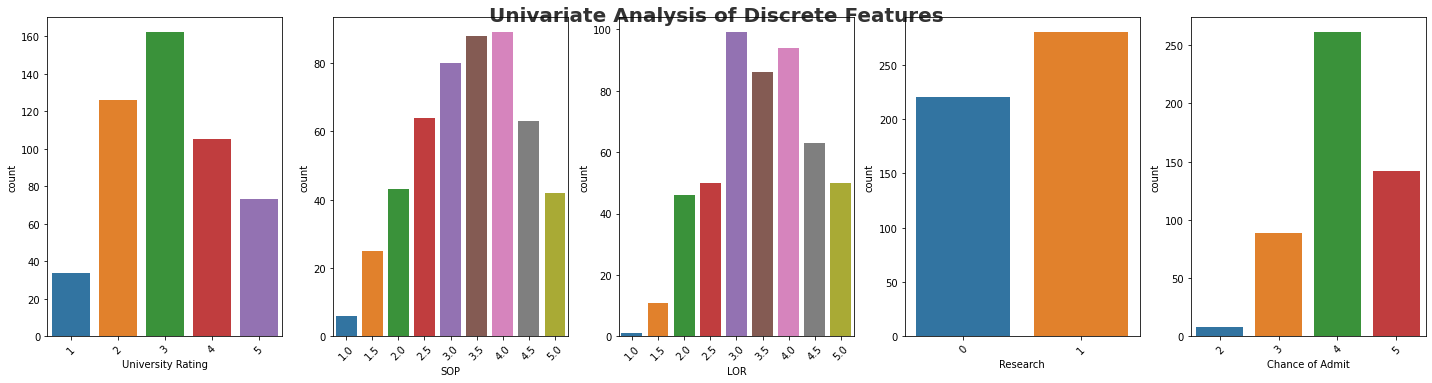

In [134]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Discrete Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(discrete_features)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df_1[discrete_features[i]] )
    plt.xlabel(discrete_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()



Observations:
1. most people have university rating between 2-4
2. most people have SOP between 2.5-4.5
3. most people have LOR between 3-4.5
4. most people have done their research
5. there is high chances of most of the poeple getting selected.

# **Splitting the dataset**

In [116]:
df_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,5
2,324,107,4,4.0,4.5,8.87,1,4
3,316,104,3,3.0,3.5,8.00,1,4
4,322,110,3,3.5,2.5,8.67,1,4
5,314,103,2,2.0,3.0,8.21,0,4


In [117]:
y = df_1.loc[:,'Chance of Admit']

In [118]:
y.shape

(500,)

In [119]:
X = df_1.drop('Chance of Admit', axis = 1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 47.4 KB


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
X_train

array([[-5.25174731e-01, -7.06985745e-01, -8.28848674e-02, ...,
         5.38819022e-01, -8.35765678e-01, -1.14470294e+00],
       [ 4.77035981e-01,  2.76433873e-01,  1.65251704e+00, ...,
        -1.61323061e-03,  3.63045482e-01, -1.14470294e+00],
       [-7.98504925e-01, -1.03479228e+00, -9.50585823e-01, ...,
         5.38819022e-01, -1.15657430e+00, -1.14470294e+00],
       ...,
       [-1.34516531e+00, -1.36259882e+00, -1.81828678e+00, ...,
        -1.62290999e+00, -2.25407747e+00, -1.14470294e+00],
       [-7.07394861e-01, -3.79179206e-01, -9.50585823e-01, ...,
         5.38819022e-01, -1.52803691e+00, -1.14470294e+00],
       [-2.51844537e-01, -2.15275936e-01, -9.50585823e-01, ...,
        -1.61323061e-03, -5.65611050e-01, -1.14470294e+00]])

In [124]:
X_test

array([[ 1.57035676e+00,  1.42375676e+00,  7.84816088e-01, ...,
        -1.61323061e-03,  1.61251063e+00,  8.73589088e-01],
       [-2.51844537e-01,  1.12530603e-01,  7.84816088e-01, ...,
         5.38819022e-01,  7.68277423e-01,  8.73589088e-01],
       [-1.60734472e-01, -3.79179206e-01, -9.50585823e-01, ...,
        -1.08247774e+00, -1.57869090e+00, -1.14470294e+00],
       ...,
       [-6.96244077e-02, -7.06985745e-01, -9.50585823e-01, ...,
         1.07925128e+00,  2.61737496e-01, -1.14470294e+00],
       [-6.16284796e-01, -1.36259882e+00, -9.50585823e-01, ...,
        -1.62290999e+00, -2.16965415e+00, -1.14470294e+00],
       [ 2.14856571e-02, -2.15275936e-01, -1.81828678e+00, ...,
        -1.61323061e-03, -1.57869090e+00,  8.73589088e-01]])

# **Applying SVC algorithm for model building on training dataset and **

In [125]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =0)


In [126]:
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [127]:
y_pred = classifier.predict(X_test)

In [128]:
score = classifier.score(X_test, y_test)
print(score)

0.8242424242424242


# **Calculating the scoring matrix on the model.**

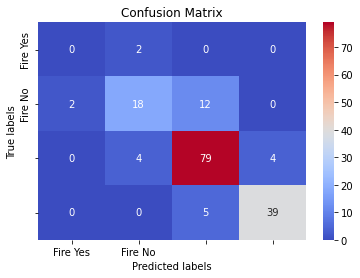

In [129]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm_svc_classifier = confusion_matrix(y_test, y_pred)

ax = plt.subplot()

sns.heatmap(cm_svc_classifier, annot=True, ax = ax, fmt = '', cmap = 'coolwarm'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire Yes', 'Fire No']); ax.yaxis.set_ticklabels(['Fire Yes', 'Fire No']);

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.75      0.56      0.64        32
           4       0.82      0.91      0.86        87
           5       0.91      0.89      0.90        44

    accuracy                           0.82       165
   macro avg       0.62      0.59      0.60       165
weighted avg       0.82      0.82      0.82       165

